In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
dataset = pd.read_csv('dataset.csv', index_col=0, header=[0, 1]).sort_index(axis=1)

In [66]:
key = 'AAL'
df = dataset[key]


In [67]:
df['year'] = pd.to_datetime(dataset['AAL'].index).year
df['month'] = pd.to_datetime(dataset['AAL'].index).month
df['day'] = pd.to_datetime(dataset['AAL'].index).day

days = np.unique(df[['year', 'month', 'day']].values, axis=0)

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to b

In [68]:
tickers = []
for k in dataset.keys():
    tickers.append(k)
tickers = np.unique(tickers)

In [69]:
tickers = np.random.choice(tickers, 5, replace = False)

In [207]:
all_dfs = []
for day in days:
    y, m, d = day
    day_df = {}
    
    
    for tic in tickers:
        tic_df = dataset[tic]
        
        tic_df['year'] = pd.to_datetime(tic_df.index).year
        tic_df['month'] = pd.to_datetime(tic_df.index).month
        tic_df['day'] = pd.to_datetime(tic_df.index).day

        day_df[tic] = tic_df.loc[(tic_df['year'] == y)&(tic_df['month'] == m)&(tic_df['day'] == d)]['close'].values
    day_df = pd.DataFrame.from_dict(day_df).interpolate()
    
    for tic in tickers:
        srs = day_df[tic]
        for i in range(len(srs)):
            if np.isnan(srs[i]):
                for j in range(i+1, len(srs)):
                    if not np.isnan(srs[j]):
                        srs[i] = srs[j]

                        break

            else:
                break

        for i_ in range(1, len(srs)):
            i = -i_
            if np.isnan(srs.iloc[i]):
                for j_ in range(i_+1, len(srs)):
                    j = -j_
                    if not np.isnan(srs.iloc[j]):
                        srs.iloc[i] = srs.iloc[j]

                        break
        
    
    all_dfs.append(pd.DataFrame.from_dict(day_df))
        
    
    

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_l

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarn

In [208]:
df_list = []
for df in all_dfs:
    if len(df) == 391:
        df_list.append(df[::10].reset_index(drop = True))
    

In [233]:
import pickle
train_dfs = df_list[:80]
test_dfs = df_list[80:]
pickle.dump(train_dfs, open('df_list', 'wb'))
pickle.dump(test_dfs, open('test_df_list', 'wb'))

In [232]:
len(df_list)

108

In [180]:
all

0         NaN
1         NaN
2      97.920
3      97.830
4      97.850
        ...  
386    97.090
387    97.060
388    97.060
389    97.105
390       NaN
Name: DIS, Length: 391, dtype: float64

In [181]:
for i in range(len(srs)):
    if np.isnan(srs[i]):
        for j in range(i+1, len(srs)):
            if not np.isnan(srs[j]):
                srs[i] = srs[j]
    
                break
                
    else:
        break
        
for i_ in range(1, len(srs)):
    i = -i_
    if np.isnan(srs.iloc[i]):
        for j_ in range(i_+1, len(srs)):
            j = -j_
            if not np.isnan(srs.iloc[j]):
                srs.iloc[i] = srs.iloc[j]
    
                break
        

In [205]:
df_list[0][::10]

,LLL,DIS,WM,BRK.B,FTI
0,182.850000,97.9014,77.6000,178.1400,25.770
10,182.650000,97.6000,77.5400,178.3500,25.610
20,182.780000,97.5000,77.5800,177.4000,25.650
30,182.865000,97.7400,77.6000,177.6100,25.690
40,182.775000,97.6000,77.4799,177.7600,25.740
50,182.770000,97.5547,77.5750,177.6200,25.765
60,182.540000,97.4600,77.5500,177.6700,25.685
70,182.914286,97.5400,77.4450,177.6406,25.665
80,182.975960,97.6300,77.4001,177.4700,25.780
90,182.875000,97.5301,77.3350,177.7734,25.865


In [211]:
df_list[0]

,LLL,DIS,WM,BRK.B,FTI
0,182.850000,97.9014,77.6000,178.1400,25.770
1,182.650000,97.6000,77.5400,178.3500,25.610
2,182.780000,97.5000,77.5800,177.4000,25.650
3,182.865000,97.7400,77.6000,177.6100,25.690
4,182.775000,97.6000,77.4799,177.7600,25.740
5,182.770000,97.5547,77.5750,177.6200,25.765
6,182.540000,97.4600,77.5500,177.6700,25.685
7,182.914286,97.5400,77.4450,177.6406,25.665
8,182.975960,97.6300,77.4001,177.4700,25.780
9,182.875000,97.5301,77.3350,177.7734,25.865


In [212]:
df_list[-1]

,LLL,DIS,WM,BRK.B,FTI
0,210.4500,105.4200,87.4000,202.0000,30.220
1,211.5050,104.9900,85.3295,202.7100,29.980
2,210.9700,105.2700,84.3400,202.5995,29.980
3,211.1300,105.1300,83.7050,202.9600,30.090
4,210.1200,104.9200,83.6729,202.2050,29.900
5,209.8100,104.6800,83.9300,202.6200,29.690
6,209.4800,104.7400,84.2800,202.5000,29.760
7,210.4500,104.6300,84.2900,202.1700,29.600
8,210.2300,104.6300,83.7300,201.6500,29.519
9,209.8400,104.2000,83.3900,200.7600,29.280


In [222]:
5.0/25

0.2

In [214]:
len(df_list)

108

In [215]:
days

array([[2017,    9,   11],
       [2017,    9,   12],
       [2017,    9,   13],
       [2017,    9,   14],
       [2017,    9,   15],
       [2017,    9,   18],
       [2017,    9,   19],
       [2017,    9,   20],
       [2017,    9,   21],
       [2017,    9,   22],
       [2017,    9,   25],
       [2017,    9,   26],
       [2017,    9,   27],
       [2017,    9,   28],
       [2017,    9,   29],
       [2017,   10,    2],
       [2017,   10,    3],
       [2017,   10,    4],
       [2017,   10,    5],
       [2017,   10,    6],
       [2017,   10,    9],
       [2017,   10,   10],
       [2017,   10,   11],
       [2017,   10,   12],
       [2017,   10,   13],
       [2017,   10,   16],
       [2017,   10,   17],
       [2017,   10,   18],
       [2017,   10,   19],
       [2017,   10,   20],
       [2017,   10,   23],
       [2017,   10,   24],
       [2017,   10,   25],
       [2017,   10,   26],
       [2017,   10,   27],
       [2017,   10,   30],
       [2017,   10,   31],
 

In [261]:
frac_dfs = []
for df in df_list:
    frac_dfs.append(np.divide(df.loc[1:], df.loc[:len(df) - 2]) - 1)
    
frac_dfs = pd.concat(frac_dfs)

/Users/anubhavguha/.pyenv/versions/3.7.3/envs/venv-884/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [275]:
np.std(frac_dfs.values[:,0])

0.0018577130163893764

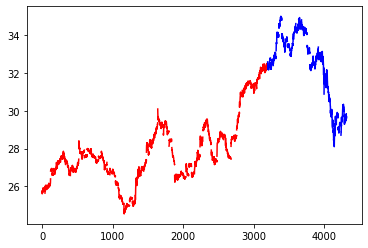

In [291]:
count = 0
tic = tickers[4]
for i in range(80):
    plt.plot(np.arange(count, count + len(df_list[i])), df_list[i][tic], c = 'r')
    count += len(df_list[i])

for i in range(80, len(df_list)):
    plt.plot(np.arange(count, count + len(df_list[i])), df_list[i][tic], c = 'b')
    count += len(df_list[i])


In [284]:
tickers

array(['LLL', 'DIS', 'WM', 'BRK.B', 'FTI'], dtype='<U6')